https://datahacker.rs/006-morphological-transformations-with-opencv-in-python/

In [146]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [147]:
# Loading an input image and performing thresholding
img = cv2.imread('pcb.jpg', cv2.IMREAD_GRAYSCALE)


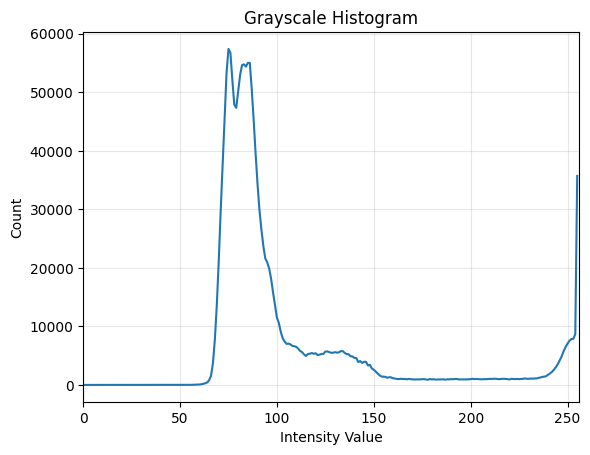

In [148]:
grey_hist = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.plot(grey_hist)
plt.title('Grayscale Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Count')
plt.xlim([0, 256])
plt.grid(True, alpha=0.3)

In [149]:
_, mask=cv2.threshold(img, 200, 255, cv2.THRESH_BINARY)

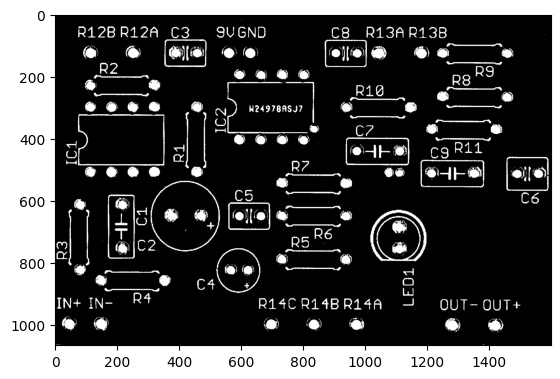

In [150]:

plt.imshow(mask, cmap='gray')
plt.show()

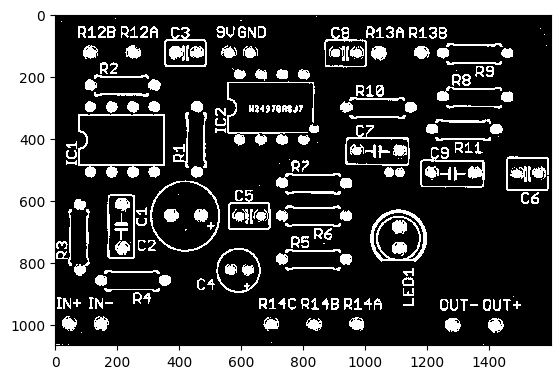

In [151]:
# Creating a 3x3 kernel
# Uint8 type for the kernel
# all 1s, can be something else
kernel = np.ones((3,3), np.uint8)
# Performing dilation on the mask
# Dilation adds pixels to the boundaries of objects in an image
# Sets pixels to white if at least one of the neighbouring pixels that have a 1 in the kernel mask is white (here: any neighbouring pixel)
dilation = cv2.dilate(mask, kernel)

# interpolation='nearest' to avoid interpolation artifacts in binary images , i.e. gray levels that are not 0 or 255
plt.imshow(dilation, cmap='gray', interpolation='nearest')
plt.show()

In [152]:
np.unique(dilation)

array([  0, 255], dtype=uint8)

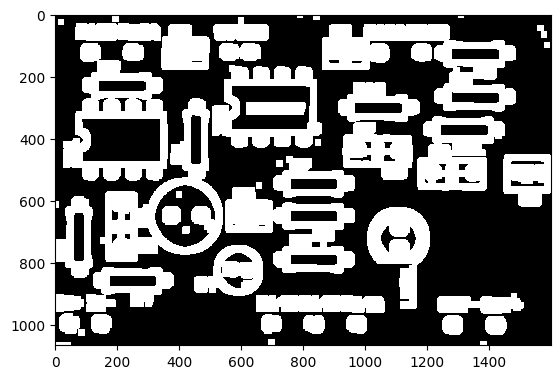

In [153]:
# 10 times dilation
dilation10 = cv2.dilate(mask, kernel, iterations=10)
plt.imshow(dilation10, cmap='gray', interpolation='nearest')
plt.show()

In [154]:
# Erosion removes pixels on object boundaries
# Sets pixels to black if at least one of the neighbouring pixels that have a 1 in the kernel mask is black (here: any neighbouring pixel)
# Performing an erosion with a 3x3 kernel and the mask
kernel=np.ones((3,3), np.uint8)
erosion=cv2.erode(mask, kernel)

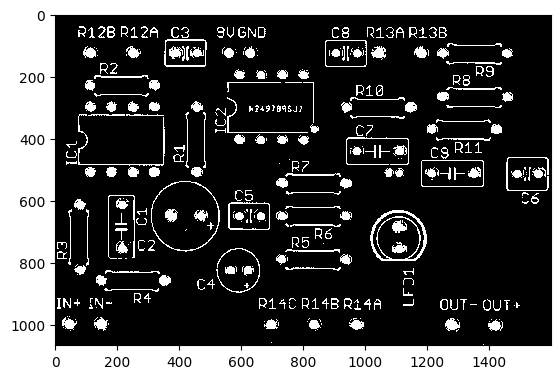

In [155]:
plt.imshow(mask, cmap='gray', interpolation='nearest')
plt.show()

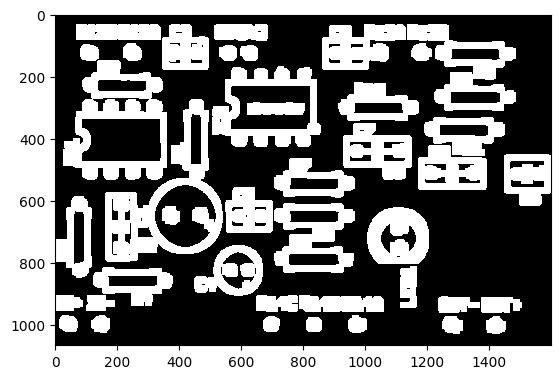

In [156]:
# Opening: erosion followed by dilation
# Should remove the little pixels at the top right (see 10x dilation above)
erosion=cv2.erode(mask, kernel)
dilation10 = cv2.dilate(erosion, kernel, iterations=10)

plt.imshow(dilation10, cmap='gray', interpolation='nearest')
plt.show()


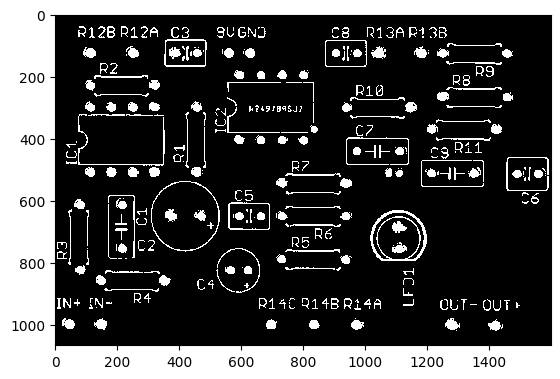

In [157]:
# cv2 opening function

opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)    
plt.imshow(opening, cmap='gray', interpolation='nearest')
plt.show()

In [158]:
kernel=np.ones((3,3), np.uint8)
dilation=cv2.dilate(mask, kernel, iterations=1)
erosion=cv2.erode(mask, kernel, iterations=1)
opening=cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
closing=cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
mg=cv2.morphologyEx(mask, cv2.MORPH_GRADIENT, kernel)
th=cv2.morphologyEx(mask, cv2.MORPH_TOPHAT, kernel)

In [159]:
titles=["image","mask","dilation","erosion","opening","closing","mg","th"]
images=[img, mask, dilation, erosion, opening, closing, mg, th]

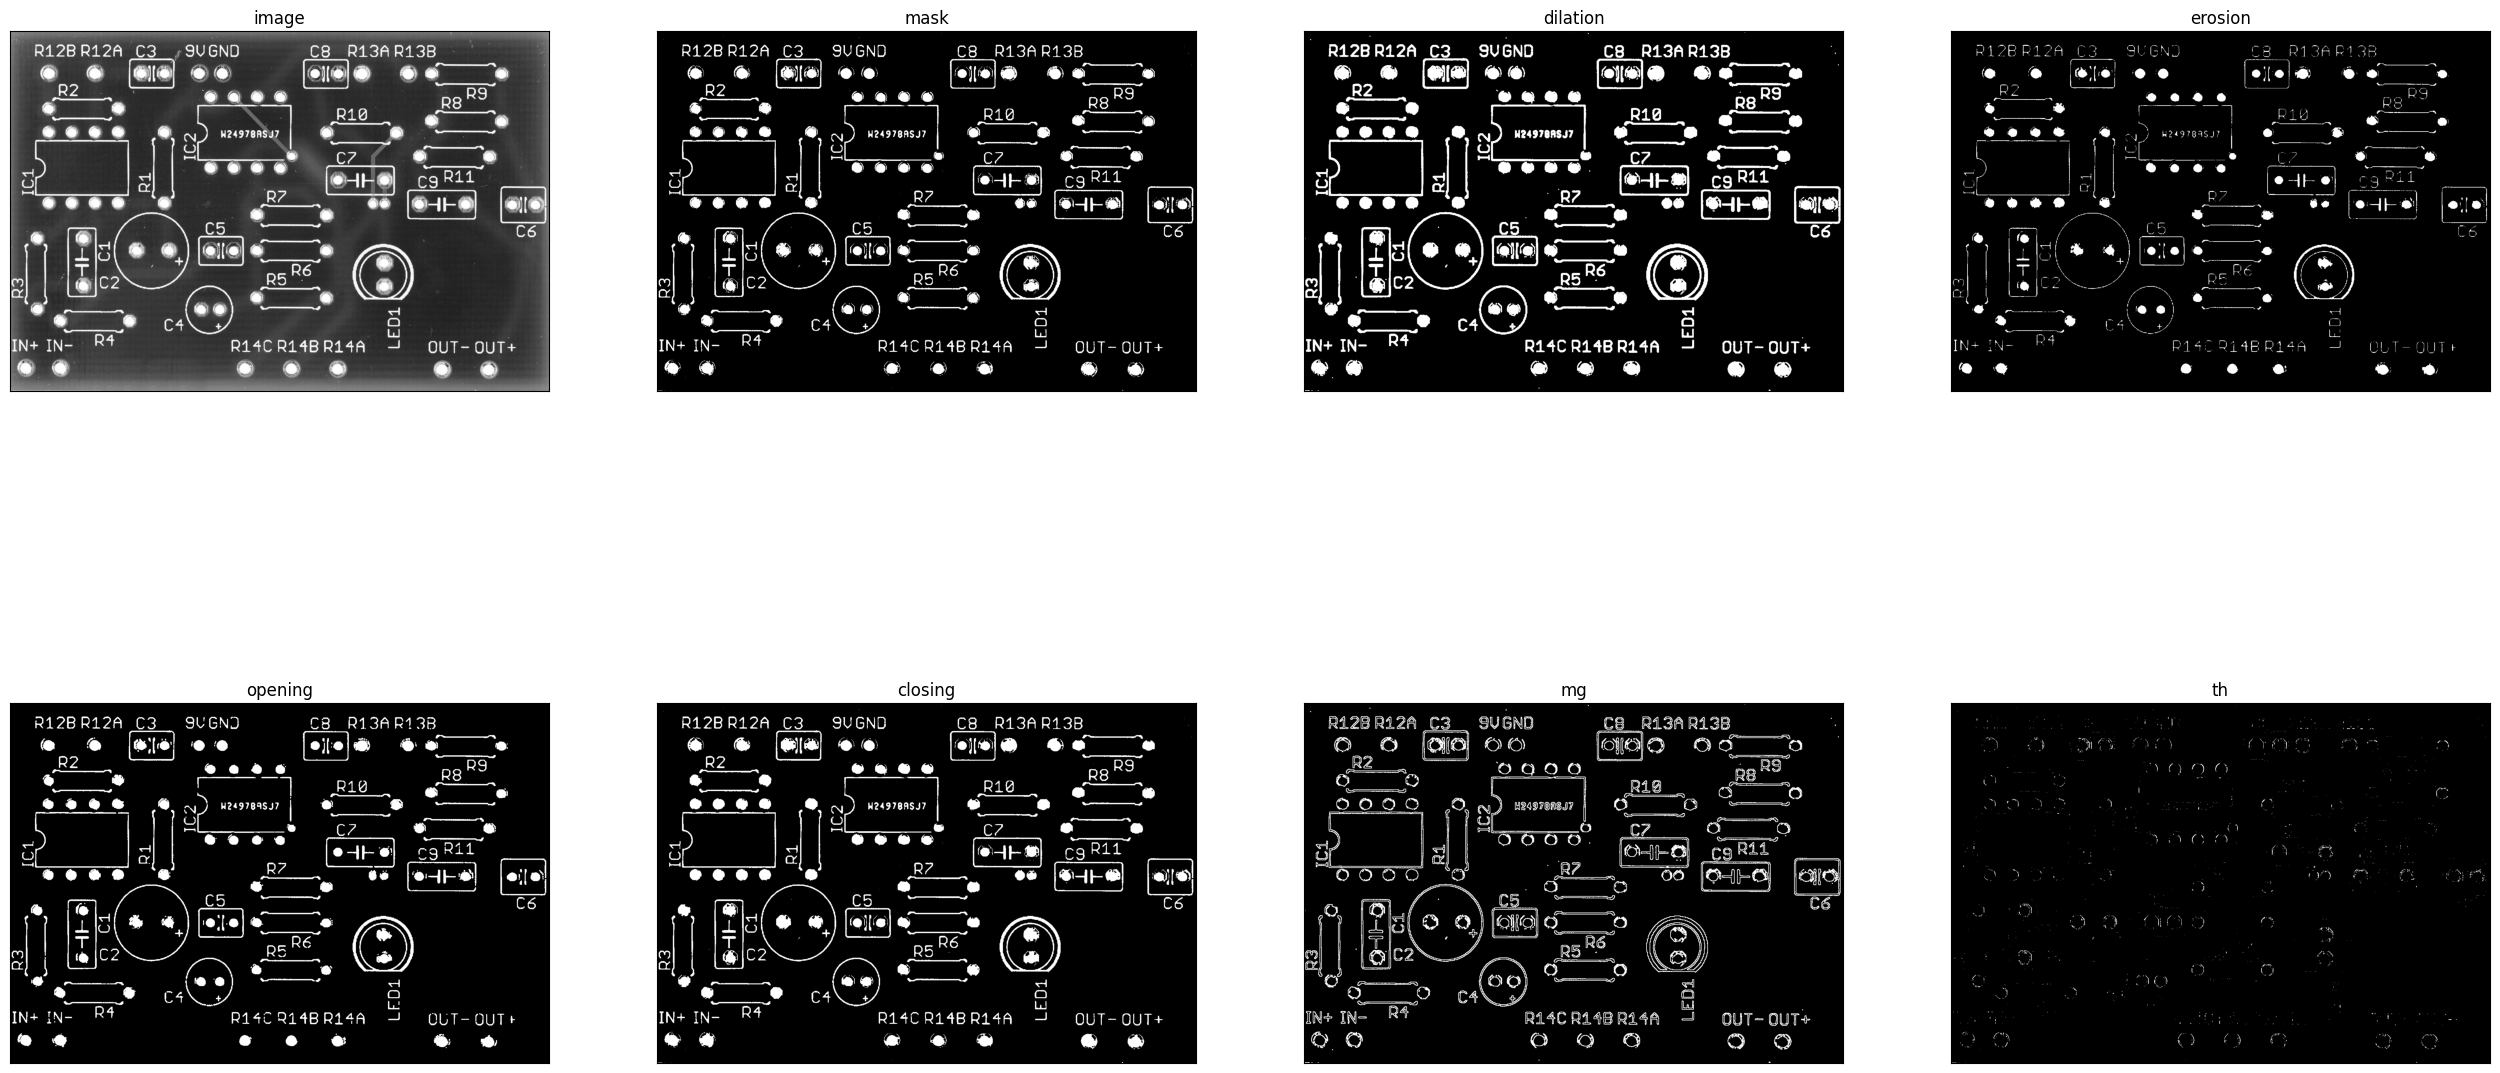

In [160]:
plt.figure(figsize=(32, 16))  # ← make the whole figure bigger
for i in range(8):
  plt.subplot(2, 4, i+1)
  plt.imshow(images[i], "gray")
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

In [161]:
# Different types of kernels

img = np.zeros ( (30 , 30), np.uint8, )
# Creating 3x3 kernels of different shapes
kernel_1 =np.array ( [  [0,1,0], [1,1,1], [0,1,0] ]  )
kernel_2 =np.array ( [  [0,0,1], [0,0,1], [0,0,1] ]  )
kernel_3 =np.array ( [  [1,1,1], [0,0,0], [0,0,0] ]  )

kernel_1 = kernel_1.astype('uint8')
kernel_2 = kernel_2.astype('uint8')
kernel_3 = kernel_3.astype('uint8')

# we add a white letter 'D' on the black image - img
font = cv2.FONT_HERSHEY_PLAIN
cv2.putText(img, 'D', (5,25), font, 2, (255,255,255), 3);

In [162]:
titles=["kernel_1","kernel_2","kernel_3"]
images=[ kernel_1, kernel_2, kernel_3]

<function matplotlib.pyplot.show(close=None, block=None)>

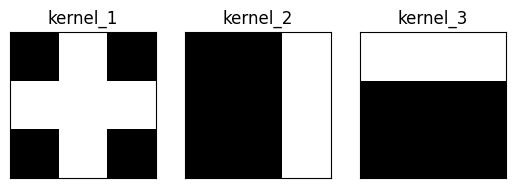

In [163]:
for i in range(3):
  plt.subplot(1, 3, i+1), plt.imshow(images[i], "gray")
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show 

In [164]:
# Performing dilation and erosion 
dilation_1 = cv2.dilate(img, kernel_1)
dilation_2 = cv2.dilate(img, kernel_2)
dilation_3 = cv2.dilate(img, kernel_3)
erosion_1 = cv2.erode(img, kernel_1)
erosion_2 = cv2.erode(img, kernel_2)
erosion_3 = cv2.erode(img, kernel_3)

In [165]:
titles=["dilation_1","dilation_2","dilation_3","erosion_1","erosion_2",
        "erosion_3"]
images=[ dilation_1, dilation_2, dilation_3, erosion_1, erosion_2,
        erosion_3]

<function matplotlib.pyplot.show(close=None, block=None)>

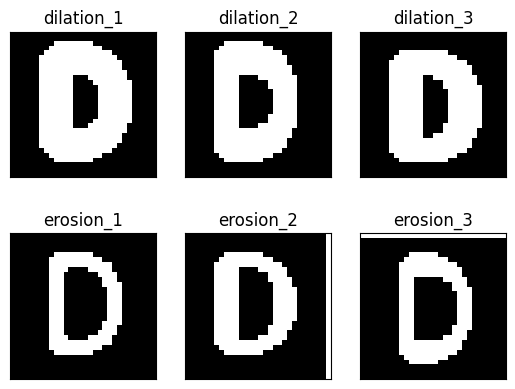

In [166]:
for i in range(6):
  plt.subplot(2, 3, i+1), plt.imshow(images[i], "gray")
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show 

In [167]:
# Performing opening and closing  
opening_1 = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel_1)
opening_2 = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel_2)
opening_3 = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel_3)
closing_1 = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel_1)
closing_2 = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel_2)
closing_3 = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel_3)

In [168]:
titles=["opening_1","opening_2","opening_3","closing_1","closing_2",
        "closing_3"]
images=[ opening_1, opening_2, opening_3, closing_1, closing_2,
        closing_3]

<function matplotlib.pyplot.show(close=None, block=None)>

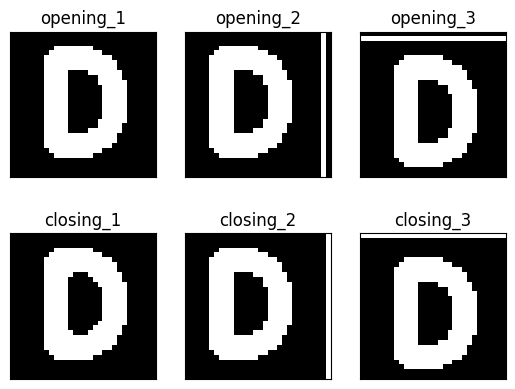

In [169]:
for i in range(6):
  plt.subplot(2, 3, i+1), plt.imshow(images[i], "gray")
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show 

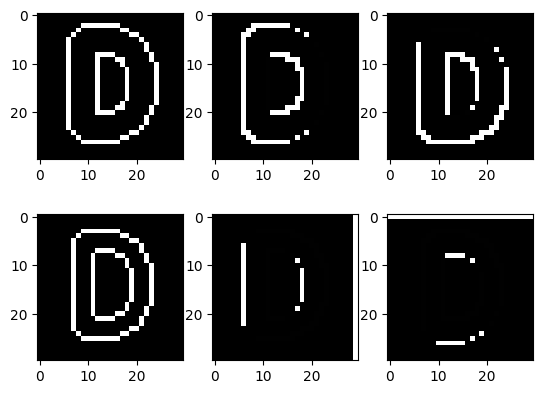

In [170]:

# Plotting the differences between original and transformed images
plt.subplot(2,3,1)
plt.imshow(dilation_1-img, "gray")
plt.subplot(2,3,2)
plt.imshow(dilation_2-img, "gray")
plt.subplot(2,3,3)
plt.imshow(dilation_3-img, "gray")
plt.subplot(2,3,4)
plt.imshow(erosion_1-img, "gray")
plt.subplot(2,3,5)
plt.imshow(erosion_2-img, "gray")
plt.subplot(2,3,6)
plt.imshow(erosion_3-img, "gray")

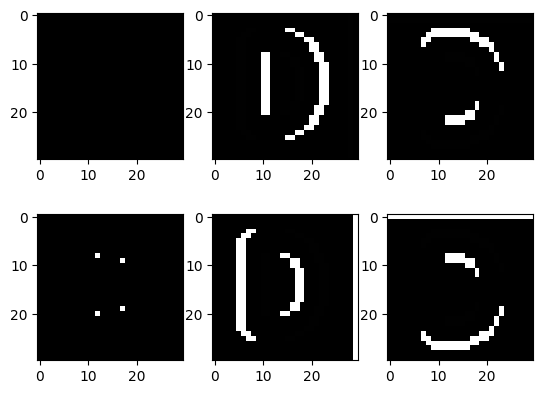

In [171]:
plt.subplot(2,3,1)
plt.imshow(img-opening_1, "gray")
plt.subplot(2,3,2)
plt.imshow(img-opening_2, "gray")
plt.subplot(2,3,3)
plt.imshow(img-opening_3, "gray")
plt.subplot(2,3,4)
plt.imshow(closing_1-img, "gray")
plt.subplot(2,3,5)
plt.imshow(closing_2-img, "gray")
plt.subplot(2,3,6)
plt.imshow(closing_3-img, "gray")